In [1]:

!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
def get_data(with_outliers=True):

  x = np.linspace(-3, 3, 100)
  y = 3 * x**2 + 2 * x + 1 + np.random.normal(0, 1, size=x.shape)
  if with_outliers:
    outliers_x = np.array([-2.5, 2.5])
    outliers_y = np.array([30, -10])
    x = np.append(x, outliers_x)
    y = np.append(y, outliers_y)
  return x, y

In [6]:
def plot_data(x, y):
  plt.scatter(x, y, label="Data Points")
  plt.title("Dataset with Outliers")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

In [7]:
x, y = get_data()


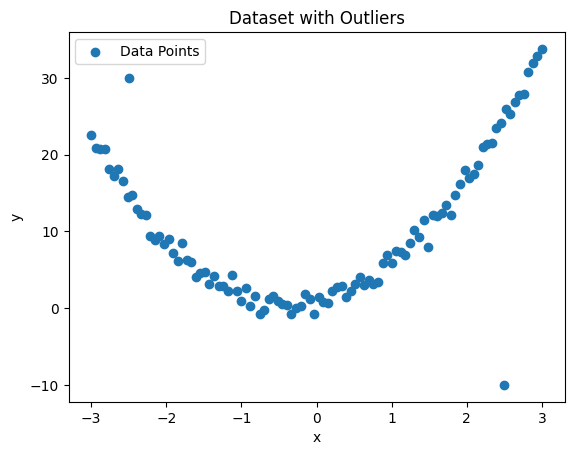

In [9]:
plot_data(x, y)

In [10]:
def compute_mse(y, y_pred):
    """
    Computes the Mean Squared Error.
    :param y: True values.
    :param y_pred: Predicted values.
    :return: MSE.
    """
    mse = np.mean((y - y_pred) ** 2)
    return mse
    

In [11]:
def polynomial_regression(x, y, degree):
    """
    Performs polynomial regression.
    :param x: Input feature array.
    :param y: Target vector.
    :param degree: Polynomial degree.
    :return: Coefficients.
    """
    X = np.vander(x, degree + 1, increasing=True)
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

In [22]:
def tikhonov_regression(X, y, matrix):
    """
    Performs Tikhonov regularization.
    :param X: Input feature matrix.
    :param y: Target vector.
    :param matrix: Regularization matrix.
    :return: Coefficients.
    """
    regularization_term = matrix.T @ matrix
    coefficients = np.linalg.inv(X.T @ X + regularization_term) @ X.T @ y
    return coefficients

In [12]:
def ridge_regression(X, y, lambda_val):
    """
    Performs Ridge Regression (L2 Regularization).
    :param X: Input feature matrix.
    :param y: Target vector.
    :param lambda_val: Regularization parameter.
    :return: Coefficients.
    """
    regularization_term = lambda_val * np.eye(X.shape[1])
    coefficients = np.linalg.inv(X.T @ X + regularization_term) @ X.T @ y
    return coefficients

In [13]:
def weighted_regression(X, y, weights):
    """
    Solves weighted regression.
    :param X: Input feature matrix.
    :param y: Target vector.
    :param weights: Diagonal weight matrix.
    :return: Coefficients.
    """
    # W = np.diag(weights)
    coefficients = np.linalg.inv(X.T @ weights @ X) @ X.T @ weights @ y
    return coefficients


In [14]:
def compare_regressions(x, y, degrees, lambdas):
    """
    Compares results for Regular, Ridge, and Weighted Regression.
    :param x: Input feature array.
    :param y: Target vector.
    :param degrees: List of polynomial degrees.
    :param lambdas: List of regularization parameters for Ridge Regression.
    """
    
    colors_ridge = ["purple", "orange", "cyan", "brown", "pink"]  # Distinct colors for Ridge Regression
    color_weighted = "black"  # New distinct color for weighted regression
    for degree in degrees:
        X = np.vander(x, degree + 1, increasing=True)

        # Regular Regression
        coefficients_regular = polynomial_regression(x, y, degree)
        y_pred_regular = X @ coefficients_regular
        mse_regular = compute_mse(y, y_pred_regular)

        plt.figure(figsize=(12, 8))
        plt.scatter(x, y, label="Original Data", color="blue")
        plt.plot(x, y_pred_regular, label=f"Regular Regression (MSE: {mse_regular:.2f})", color="green")

        # Ridge Regression
        for idx, lambda_val in enumerate(lambdas):
            coefficients_ridge = ridge_regression(X, y, lambda_val)
            y_pred_ridge = X @ coefficients_ridge
            mse_ridge = compute_mse(y, y_pred_ridge)
            plt.plot(x, y_pred_ridge, label=f"Ridge (λ={lambda_val}, MSE: {mse_ridge:.2f})", color=colors_ridge[idx])

        weights =  1/((y-y_pred_regular)**2)
        W = np.diag(weights)
        # Weighted Regression
        coefficients_weighted = weighted_regression(X, y, W)
        y_pred_weighted = X @ coefficients_weighted
        mse_weighted = compute_mse(y, y_pred_weighted)
        plt.plot(x, y_pred_weighted, label=f"Weighted Regression (MSE: {mse_weighted:.2f})", color=color_weighted)

        plt.title(f"Regression Comparison (Degree {degree})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

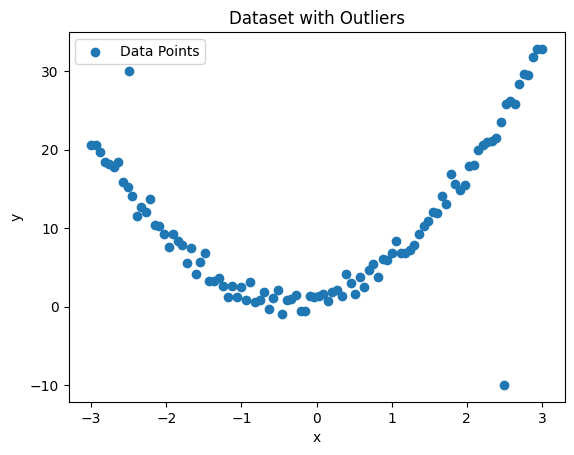

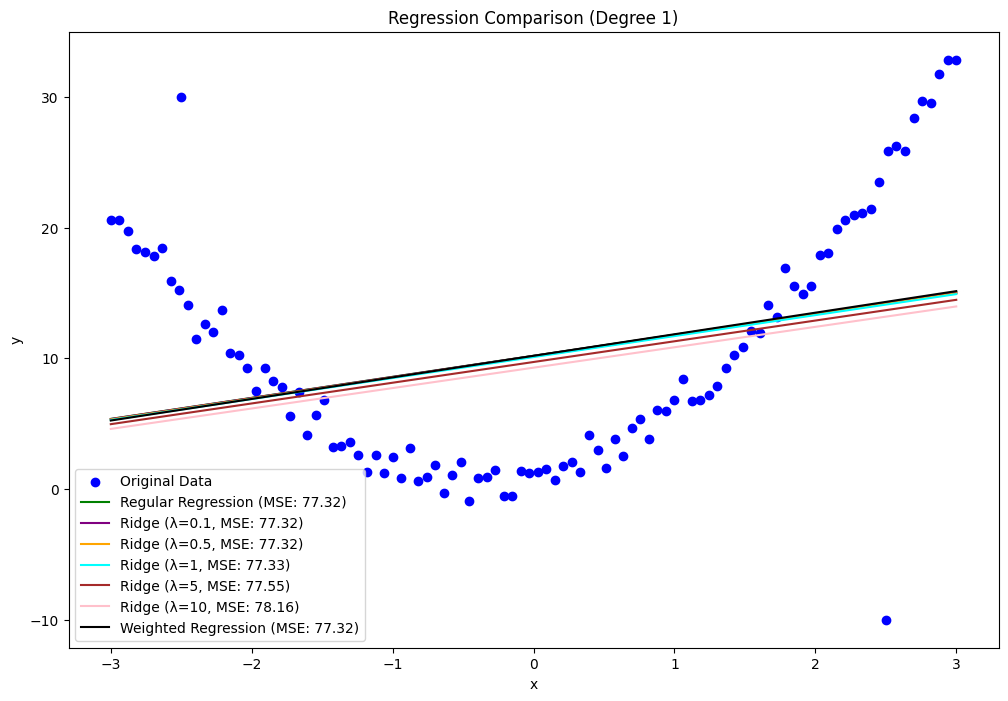

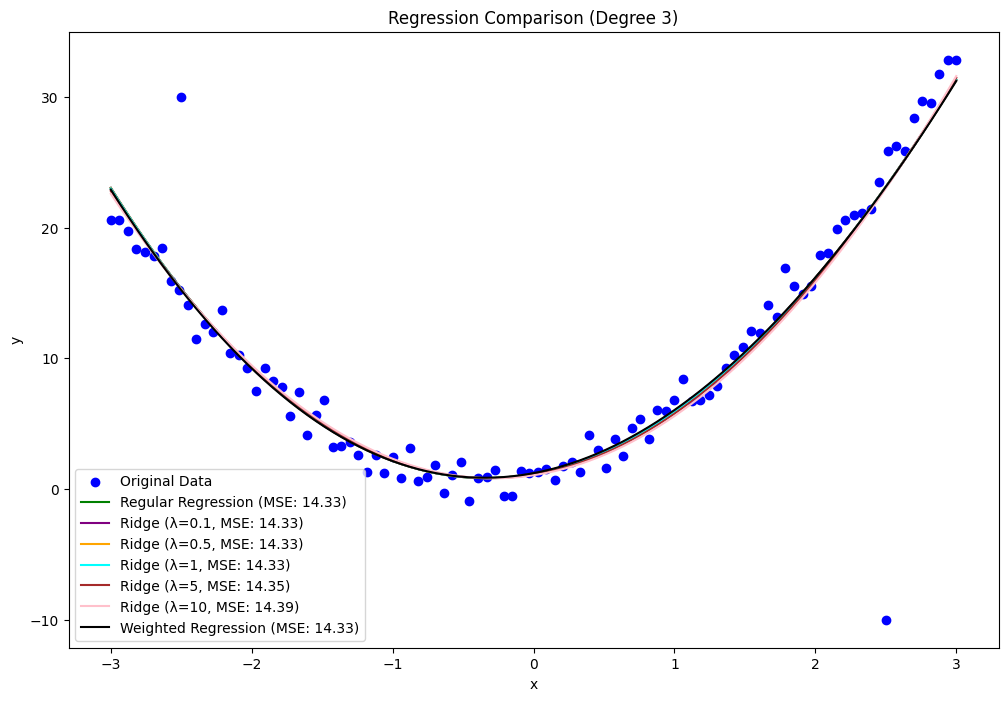

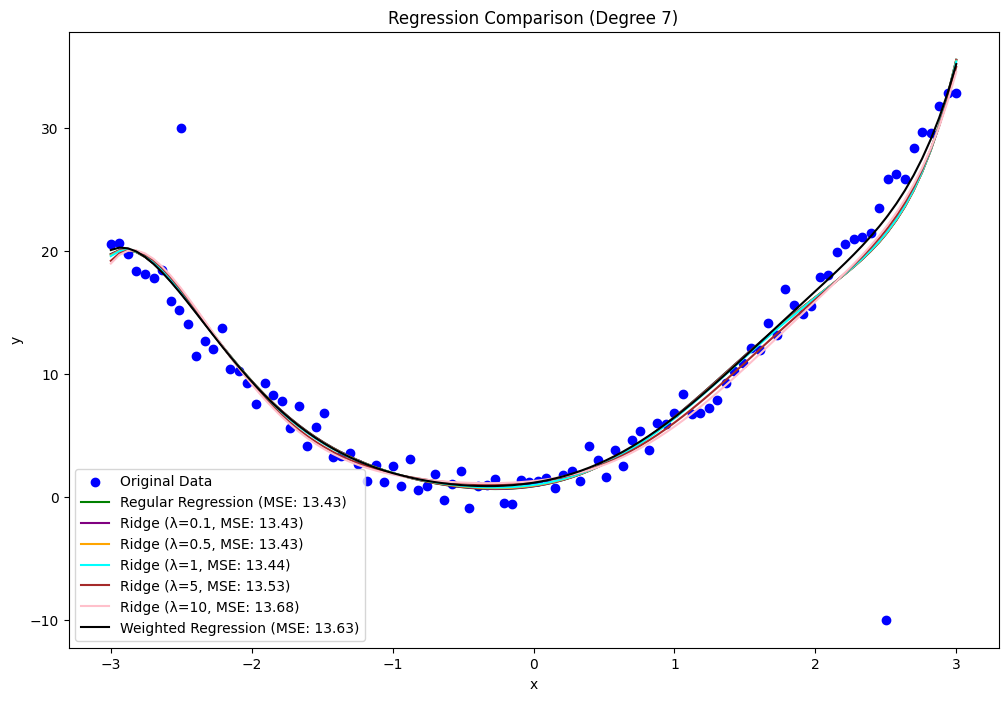

In [15]:

x, y = get_data()
plot_data(x, y)
# Sort x and y based on the order of x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

degrees = [1, 3, 7]
lambdas = [0.1, 0.5, 1, 5, 10]
compare_regressions(x_sorted, y_sorted, degrees, lambdas)
